## Homework 05:

## Due Date: Mar 6, 2024, 4:00pm

#### Firstname Lastname: Jiasheng Ni

#### E-mail: jn2294@nyu.edu

#### Enter your solutions and submit this notebook

---

### Part of Lecture 04

---

In [1]:
from itertools import product
# !pip install line_profiler
import numpy as np
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen(G):
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
    

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

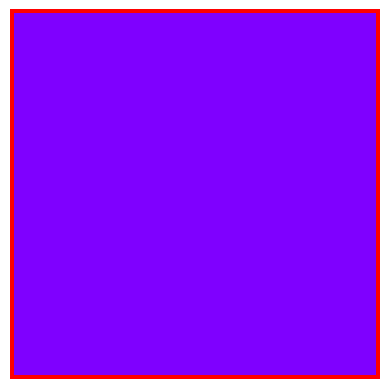

In [2]:
size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

In [3]:
%load_ext line_profiler
%lprun -f solve_heat_equation4 G4 = solve_heat_equation4(size_of_grid)

C:\Users\alexm\AppData\Local\Temp\ipykernel_54488\2926052600.py:51: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.float("inf")


Timer unit: 1e-07 s

Total time: 11.4105 s
File: C:\Users\alexm\AppData\Local\Temp\ipykernel_54488\2926052600.py
Function: solve_heat_equation4 at line 43

Line #      Hits         Time  Per Hit   % Time  Line Contents
    43                                           def solve_heat_equation4(n):
    44                                               '''changing to both calc_error_np and iteration_gen functions'''
    45         1        127.0    127.0      0.0      G = build_grid(n)
    46         1        123.0    123.0      0.0      set_boundary_grid(G)
    47                                               
    48         1         53.0     53.0      0.0      G_prev = build_grid(n)
    49         1         61.0     61.0      0.0      copy_array(G, G_prev)
    50                                               
    51         1       1043.0   1043.0      0.0      error = np.float("inf")
    52       935       9082.0      9.7      0.0      while error > 1e-7:
    53       934  113208569.0 1

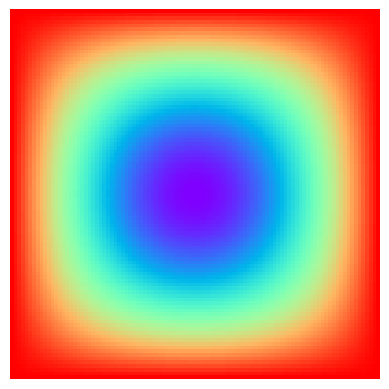

In [6]:
plot_grid(G4)


---

# Problem 1. (100 points)


In Lecture 04 we considered the heat equation over a homogeneous material for which an iteration is given by the following equation:
$$
f_{i,j} = \frac{f_{i+1,j}+f_{i-1,j} + f_{i,j+1} + f_{i,j-1}}{4} \,.
$$

This was implemented by: 
```
# using iterators to traverse the grid
def iteration_gen(G):
"""the iteration function from lect04"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
```


----

Now imagine, you are given a non-homogeneous material for which the iteration, i.e. the corresponding equation,  depends on the position $(i, j)$ and is given by:
$$
f_{i,j} := \frac{ h_{i + 1,j} f_{i + 1, j} + h_{i - 1,j} f_{i - 1,j} + h_{i,j + 1} f_{i,j+1} + h_{i,j - 1} f_{i,j-1}}{ h_{i + 1,j} + h_{i - 1,j} + h_{i,j + 1} + h_{i,j - 1} } \,.
$$
Here "weight"
$$h(i, j) = \exp\left(-\frac{|i - j|} {\sqrt{n}}\right) \,,$$
corresponds to the point $(i, j)$, where $n$ is the size of the grid.

----

Write a new function:
```
def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
```
to solve the non-homogeneous case defined as above. 


The task here is to examine run-time improvements that can be obtained by Cython for this non-homogeneous material. Consider **solve_heat_equation4** from Lect04, which now becomes.

```
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)
```

----

Concretely, as presented in Lect05, perform the following steps and measure their run-times:

(i) simply compile the python code with Cython, without any changes;


(ii) introduce variables and arrays with ctypes (by using the command cdef);  


(iii) besides (ii), also use the content of ndarray objects in order to efficiently access the data buffer of the arrays.

---

In the sequel of the notebook, as your solution, submit codes, run-times, and plots of the following tasks:

**2.1 (30pt)** solve_heat_nonhomogeneous_equation4(100)

**2.2 (10pt)** solve_heat_nonhomogeneous_equation4(100) when applied (i)  

**2.3 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (ii)  

**2.4 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (iii)  

Notice that to obtain a best performance for the heat equation you also need to apply (i), (ii), (iii) to the functions called within "solve_heat_equation4".


# Solutions


In [2]:
%load_ext line_profiler
%load_ext Cython


**2.1 (30pt)** solve_heat_nonhomogeneous_equation4(100)



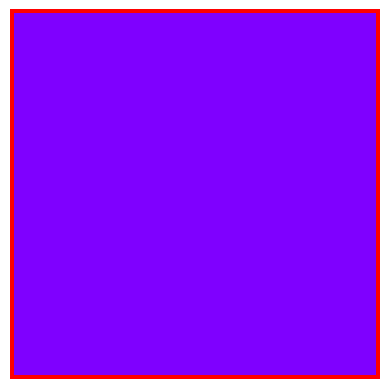

In [8]:
def iteration_gen_nonhomogeneous(G):
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        left = (e[0] - 1, e[1])
        right = (e[0] + 1, e[1])
        top = (e[0], e[1] + 1)
        bottom = (e[0], e[1] - 1)
        G[e] = G[left[0], left[1]] * np.exp(-np.abs(left[0] - left[1]) / np.sqrt(n)) \
             + G[right[0], right[1]] * np.exp(-np.abs(right[0] - right[1]) / np.sqrt(n)) \
             + G[top[0], top[1]] * np.exp(-np.abs(top[0] - top[1]) / np.sqrt(n)) \
             + G[bottom[0], bottom[1]] * np.exp(-np.abs(bottom[0] - bottom[1]) / np.sqrt(n)) 
        G[e] /= (np.exp(-np.abs(left[0] - left[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(right[0] - right[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(top[0] - top[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(bottom[0] - bottom[1]) / np.sqrt(n)))


def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)


size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


C:\Users\alexm\AppData\Local\Temp\ipykernel_54488\2459303515.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.float("inf")


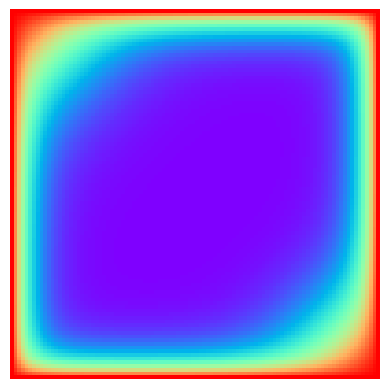

Timer unit: 1e-07 s

Total time: 60.8157 s
File: C:\Users\alexm\AppData\Local\Temp\ipykernel_54488\2459303515.py
Function: solve_heat_nonhomogeneous_equation4 at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           def solve_heat_nonhomogeneous_equation4(n):
    20                                               '''changing to both calc_error_np and iteration_gen functions'''
    21         1       1110.0   1110.0      0.0      G = build_grid(n)
    22         1        135.0    135.0      0.0      set_boundary_grid(G)
    23                                               
    24         1        234.0    234.0      0.0      G_prev = build_grid(n)
    25         1         68.0     68.0      0.0      copy_array(G, G_prev)
    26                                               
    27         1        802.0    802.0      0.0      error = np.float("inf")
    28       310       2760.0      8.9      0.0      while error > 1e-7:
 

In [7]:
%lprun -f solve_heat_nonhomogeneous_equation4 G4 = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G4)


**2.2 (10pt)** solve_heat_nonhomogeneous_equation4(100) when applied (i)  

Content of stdout:
_cython_magic_2a88d76363a3ffb9a57b561317d2e580736ca565.c
  ????? C:\Users\alexm\.ipython\cython\Users\alexm\.ipython\cython\_cython_magic_2a88d76363a3ffb9a57b561317d2e580736ca565.cp310-win_amd64.lib ??? C:\Users\alexm\.ipython\cython\Users\alexm\.ipython\cython\_cython_magic_2a88d76363a3ffb9a57b561317d2e580736ca565.cp310-win_amd64.exp
??????
????????

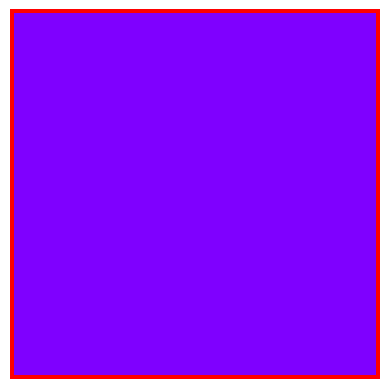

9.921875 s


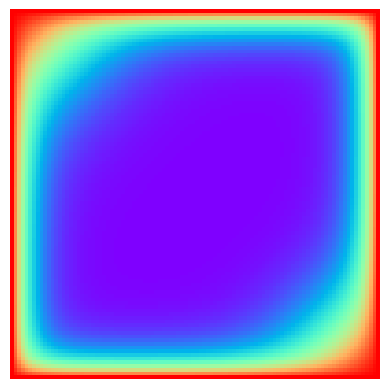

In [26]:
%%cython

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import time

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()


# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous_cython(G):
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        left = (e[0] - 1, e[1])
        right = (e[0] + 1, e[1])
        top = (e[0], e[1] + 1)
        bottom = (e[0], e[1] - 1)
        G[e] = G[left[0], left[1]] * np.exp(-np.abs(left[0] - left[1]) / np.sqrt(n)) \
             + G[right[0], right[1]] * np.exp(-np.abs(right[0] - right[1]) / np.sqrt(n)) \
             + G[top[0], top[1]] * np.exp(-np.abs(top[0] - top[1]) / np.sqrt(n)) \
             + G[bottom[0], bottom[1]] * np.exp(-np.abs(bottom[0] - bottom[1]) / np.sqrt(n)) 
        G[e] /= (np.exp(-np.abs(left[0] - left[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(right[0] - right[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(top[0] - top[1]) / np.sqrt(n)) \
             + np.exp(-np.abs(bottom[0] - bottom[1]) / np.sqrt(n)))


def solve_heat_nonhomogeneous_equation4_cython(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous_cython(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)


size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 
t = time.process_time()
G4 = solve_heat_nonhomogeneous_equation4_cython(size_of_grid)
elapsed_time = time.process_time() - t
print(elapsed_time,'s')
plot_grid(G4) 


**2.3 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (ii)  



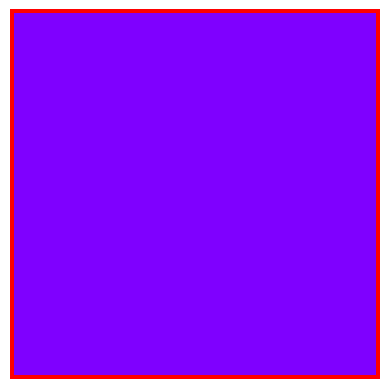

4.3125 s


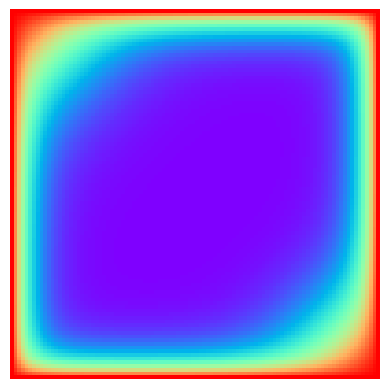

In [3]:
%%cython

from itertools import product
import numpy as np
cimport numpy as np
import matplotlib.pyplot as plt
import time

def build_grid(int n):
    '''defines the grid'''
    
    cdef np.ndarray G = np.zeros([n, n], dtype=float)
    return G

def set_boundary_grid(np.ndarray G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(np.ndarray G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray G1, np.ndarray G2):
    cdef double error = np.square(np.subtract(G1, G2)).mean()
    return error 

# deep copy of G1 to G2
def copy_array(np.ndarray G1, np.ndarray G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous_cython(np.ndarray G):
    cdef int n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)

    # Can only define outside of the loop
    cdef int left_x
    cdef int left_y
    cdef int right_x
    cdef int right_y
    cdef int top_x
    cdef int top_y
    cdef int bottom_x
    cdef int bottom_y

    for e in indices:
        left_x = e[0] - 1
        left_y = e[1]
        right_x = e[0] + 1
        right_y = e[1]
        top_x = e[0]
        top_y = e[1] + 1
        bottom_x = e[0]
        bottom_y = e[1] - 1
        # print(left_x, left_y, right_x, right_y, top_x, top_y, bottom_x, bottom_y)
        G[e] = G[left_x, left_y] * np.exp(-np.abs(left_x - left_y) / np.sqrt(n)) \
             + G[right_x, right_y] * np.exp(-np.abs(right_x - right_y) / np.sqrt(n)) \
             + G[top_x, top_y] * np.exp(-np.abs(top_x - top_y) / np.sqrt(n)) \
             + G[bottom_x, bottom_y] * np.exp(-np.abs(bottom_x - bottom_y) / np.sqrt(n)) 
        G[e] /= (np.exp(-np.abs(left_x - left_y) / np.sqrt(n)) \
             + np.exp(-np.abs(right_x - right_y) / np.sqrt(n)) \
             + np.exp(-np.abs(top_x - top_y) / np.sqrt(n)) \
             + np.exp(-np.abs(bottom_x - bottom_y) / np.sqrt(n)))


def solve_heat_nonhomogeneous_equation4_cython_ctype(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray G = build_grid(n)
    set_boundary_grid(G)
    
    cdef np.ndarray G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    cdef double error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous_cython(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return G


cdef int size_of_grid = 100
cdef np.ndarray G = build_grid(size_of_grid)
set_boundary_grid(G)
plot_grid(G) 
cdef double t = time.process_time()
cdef np.ndarray G4 = solve_heat_nonhomogeneous_equation4_cython_ctype(size_of_grid)
cdef double elapsed_time = time.process_time() - t
print(elapsed_time,'s')
plot_grid(G4) 


**2.4 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (iii)  

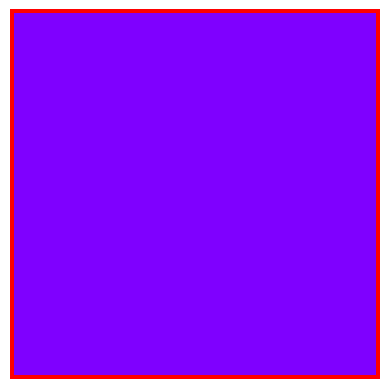

3.984375 s


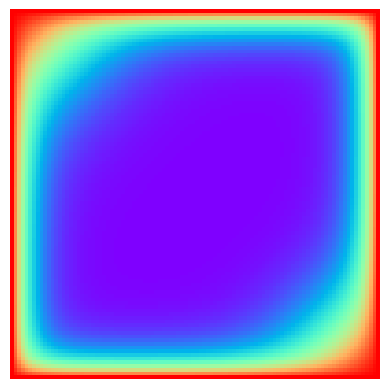

In [4]:
%%cython

from itertools import product
import numpy as np
cimport numpy as np
import matplotlib.pyplot as plt
import time

def build_grid(int n):
    '''defines the grid'''
    
    cdef np.ndarray[double, ndim = 2] G = np.zeros([n, n], dtype=float)
    return G

def set_boundary_grid(np.ndarray[double, ndim = 2] G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(np.ndarray[double, ndim = 2] G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray[double, ndim = 2] G1, np.ndarray[double, ndim = 2] G2):
    cdef double error = np.square(np.subtract(G1, G2)).mean()
    return error 

# deep copy of G1 to G2
def copy_array(np.ndarray[double, ndim = 2] G1, np.ndarray[double, ndim = 2] G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous_cython(np.ndarray[double, ndim = 2] G):
    cdef int n = G.shape[0]
    indices = product(range(1, n-1), repeat = 2)

    # Can only define outside of the loop
    cdef int left_x
    cdef int left_y
    cdef int right_x
    cdef int right_y
    cdef int top_x
    cdef int top_y
    cdef int bottom_x
    cdef int bottom_y

    for e in indices:
        left_x = e[0] - 1
        left_y = e[1]
        right_x = e[0] + 1
        right_y = e[1]
        top_x = e[0]
        top_y = e[1] + 1
        bottom_x = e[0]
        bottom_y = e[1] - 1
        # print(left_x, left_y, right_x, right_y, top_x, top_y, bottom_x, bottom_y)
        G[e] = G[left_x, left_y] * np.exp(-np.abs(left_x - left_y) / np.sqrt(n)) \
             + G[right_x, right_y] * np.exp(-np.abs(right_x - right_y) / np.sqrt(n)) \
             + G[top_x, top_y] * np.exp(-np.abs(top_x - top_y) / np.sqrt(n)) \
             + G[bottom_x, bottom_y] * np.exp(-np.abs(bottom_x - bottom_y) / np.sqrt(n)) 
        G[e] /= (np.exp(-np.abs(left_x - left_y) / np.sqrt(n)) \
             + np.exp(-np.abs(right_x - right_y) / np.sqrt(n)) \
             + np.exp(-np.abs(top_x - top_y) / np.sqrt(n)) \
             + np.exp(-np.abs(bottom_x - bottom_y) / np.sqrt(n)))


def solve_heat_nonhomogeneous_equation4_cython_ctype_index(int n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray[double, ndim = 2] G = build_grid(n)
    set_boundary_grid(G)
    
    cdef np.ndarray[double, ndim = 2] G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    cdef double error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous_cython(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return G


cdef int size_of_grid = 100
cdef np.ndarray G = build_grid(size_of_grid)
set_boundary_grid(G)
plot_grid(G) 
cdef double t = time.process_time()
cdef np.ndarray G4 = solve_heat_nonhomogeneous_equation4_cython_ctype_index(size_of_grid)
cdef double elapsed_time = time.process_time() - t
print(elapsed_time,'s')
plot_grid(G4) 